In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('winequality-red.csv',sep=';')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.duplicated().sum()

240

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
x = data.drop(columns='quality')

In [9]:
y = data['quality']

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [12]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [13]:
model.score(xtrain,ytrain)

1.0

In [14]:
ypred = model.predict(xtest)

<AxesSubplot:>

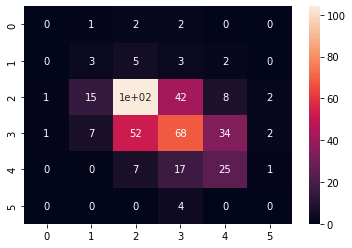

In [15]:
from sklearn.metrics import confusion_matrix as cm
sns.heatmap(cm(ytest,ypred),annot=True)

In [16]:
model.score(xtest,ytest)

0.49019607843137253

[Text(0.519725464467674, 0.9761904761904762, 'X[10] <= 10.15\ngini = 0.649\nsamples = 951\nvalue = [5, 40, 405, 371, 117, 13]'),
 Text(0.3467439681424221, 0.9285714285714286, 'X[6] <= 91.5\ngini = 0.523\nsamples = 484\nvalue = [4, 24, 305, 134, 15, 2]'),
 Text(0.2193722183181073, 0.8809523809523809, 'X[9] <= 0.575\ngini = 0.568\nsamples = 396\nvalue = [4, 23, 226, 126, 15, 2]'),
 Text(0.08678847505270555, 0.8333333333333334, 'X[6] <= 88.5\ngini = 0.486\nsamples = 173\nvalue = [2, 17, 118, 34, 2, 0]'),
 Text(0.08304052471304756, 0.7857142857142857, 'X[10] <= 9.75\ngini = 0.475\nsamples = 170\nvalue = [2, 17, 118, 31, 2, 0]'),
 Text(0.03302881236823612, 0.7380952380952381, 'X[10] <= 9.05\ngini = 0.396\nsamples = 117\nvalue = [1, 12, 89, 14, 1, 0]'),
 Text(0.007495900679315999, 0.6904761904761905, 'X[7] <= 0.998\ngini = 0.72\nsamples = 5\nvalue = [1, 2, 1, 1, 0, 0]'),
 Text(0.0037479503396579995, 0.6428571428571429, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]'),
 Text(0.011243851

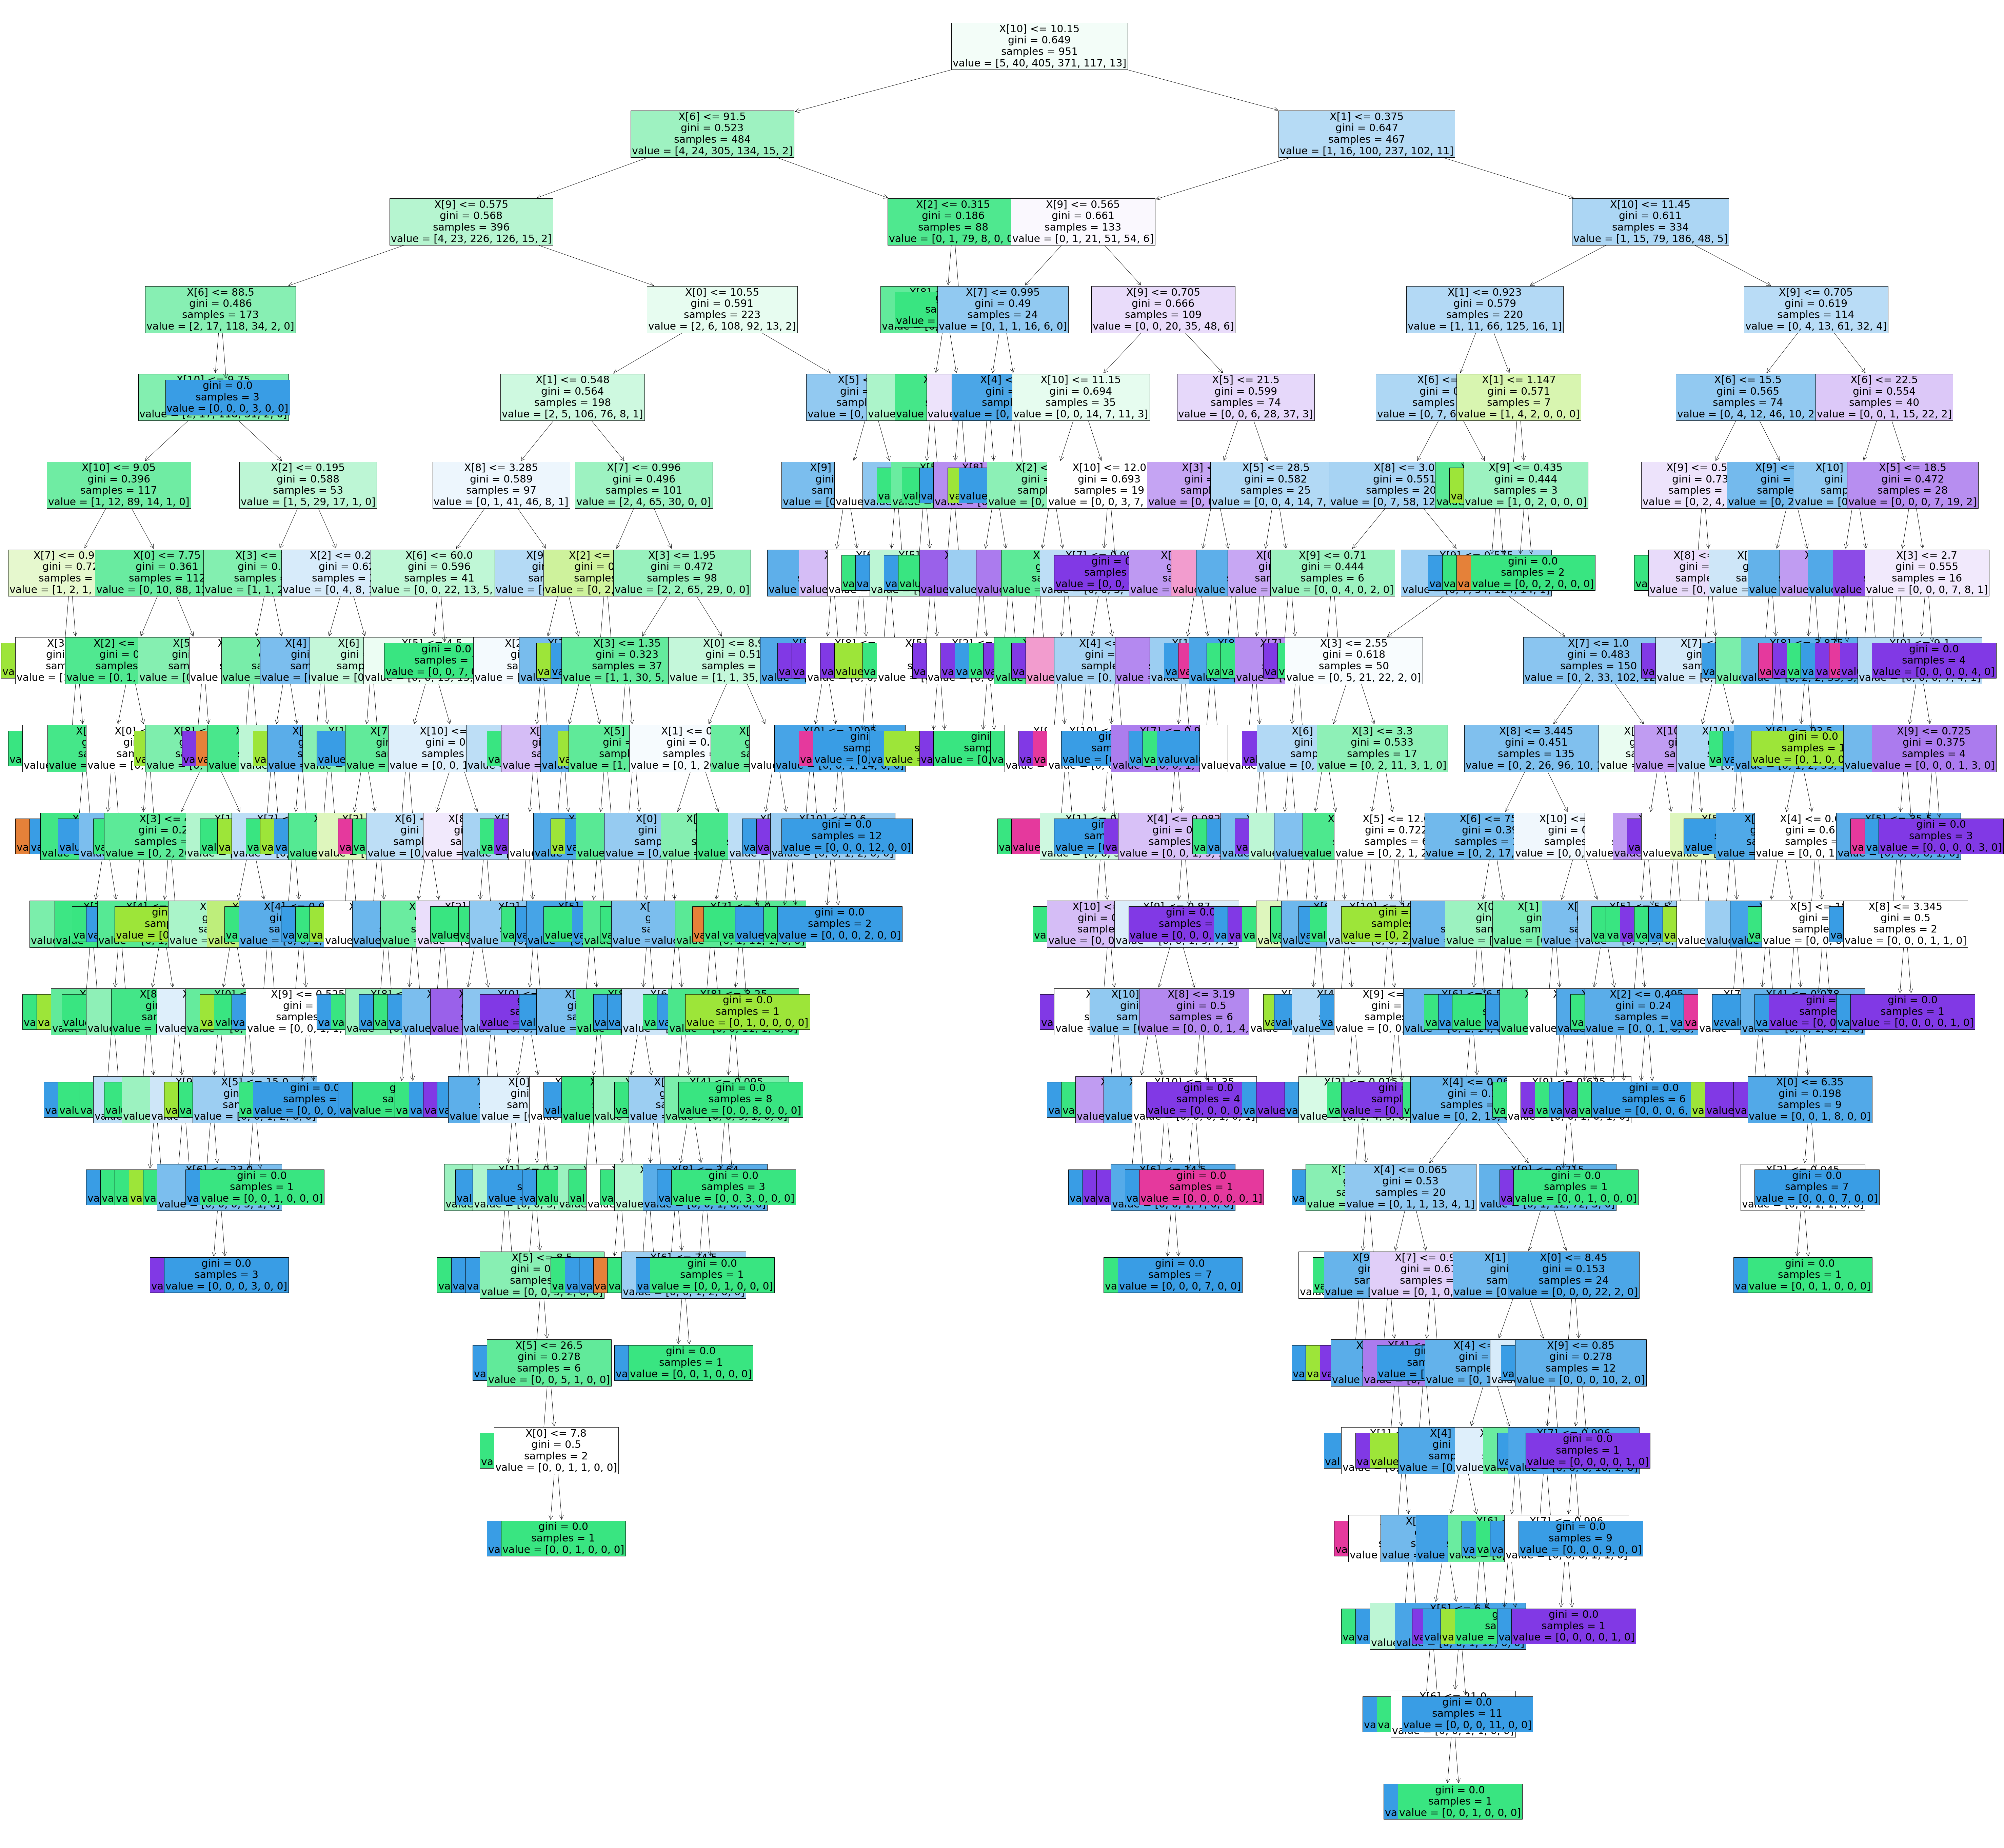

In [17]:
from sklearn import tree
plt.figure(figsize=(100,100))
plt.rcParams.update({'font.size': 30})
tree.plot_tree(model,filled=True,fontsize=30)

In [18]:
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth':range(2,10,1),
    'min_sample_leaf':range(1,8,1),
    'min_sample_split':range(2,8,1),
    'splitter':['best','random']
}

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
RF_model = RandomForestClassifier()

In [21]:
RF_model.fit(xtrain,ytrain)

RandomForestClassifier()

In [22]:
ypred = RF_model.predict(xtest)

<AxesSubplot:>

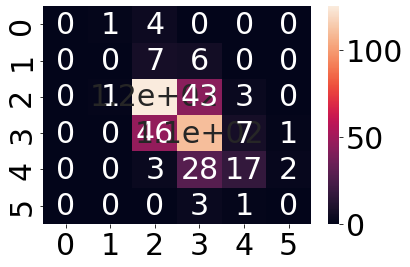

In [23]:
sns.heatmap(cm(ytest,ypred),annot=True)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(ytest,ypred)

0.6176470588235294

In [26]:
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [27]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=RF_model,param_grid=grid_param,cv=3,verbose=2,n_jobs=-1)


In [28]:
# grid_search.fit(xtrain,ytrain)

Fitting 3 folds for each of 20736 candidates, totalling 62208 fits



KeyboardInterrupt



In [29]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

model_bagging_svc = BaggingClassifier(base_estimator=SVC(),n_estimators=50, random_state=0).fit(xtrain, ytrain)


y_predict_bagging=model_bagging_svc.predict(xtest)

accuracy_score(ytest,y_predict_bagging)


0.5073529411764706

In [ ]:
# Rf_model_with_best_params=RandomForestClassifier(criterion='gini',max_depth= 14,max_features= 'log2',min_samples_leaf= 1,min_samples_split= 2,n_estimators=115)


#use bagging classiifer and regressor, extra tree classifier and regressor, voting classifer and regressor and random forest classifier and regressor on top of House hold consumpltion data and cencus data

data link:
* https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption
* https://archive.ics.uci.edu/ml/datasets/census+income


In [ ]:
# Rf_model_with_best_params.fit(xtrain,ytrain)

In [ ]:
# ypred = Rf_model_with_best_params.predict(xtest)

In [ ]:
# plt.rcParams.update({'font.size': 10})
# sns.heatmap(cm(ytest,ypred),annot=True)

In [ ]:
# accuracy_score(ytest,ypred)